In [168]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<img src="files/spam.gif" style="position:absolute; z-index: -5; vertical-align='middle'; left:100;
right:0; margin-left:auto; margin-right:auto;opacity:0.3; filter:alpha(opacity=30);"/>

# EECS 545:  Machine Learning
## Lecture 07:  Naive Bayes
* Instructor:  **Jacob Abernethy**
* Date:  February 1, 2016


*Lecture Exposition Credit: Valliappa Chockalingam, Benjamin Bray*

## Setup

Assume we have training data $(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})$.

As with a general classification problem: 

> Let $[x_1, ..., x_d]^T \in \mathbb{R}^d$ denote a feature vector.

> Let $y \in \{0, ..., K\}$ be a "class label."

Problem: Given a feature vector $x^{(i)}$ how can we predict it's corresponding class label $y^{(i)}$?

## A Motivating Example (<a href="http://images.google.com/images?num=30&amp;q=larry+bird"> Kaggle Twitter Sentiment Analysis Corpus Data by UMich SI650 </a>) 

Aim: To create a classifier that can perform Sentiment Analysis (specifically classify sentences based on whether the opinion presented in them is positive or negative) 


Dataset:
* Training set consisting of 7086 sentences classified as "positive" (1) or "negative" (0) 
* Testing set consists of 33052 unlabeled sentences.

### Step 1: Load the Training set

In [169]:
labels = [] # y, labels
sentences = [] # inputs which will later be converted to feature vectors (x's)

with open("training.txt") as training_set_file: 
    for line in training_set_file: 
        # Based on the training set file, the lines are in following format: <label>\t<sentence>\n
        # We can then separate the labels from the sentences using this format in mind.
        labels.append(line.split("\t")[0])
        sentences.append(line.split("\t")[1].replace("\n", ""))

Sample of the data we have extracted:

In [170]:
import random
sample = random.sample(range(0, len(sentences)), 5)

for index in sample:
    print(sentences[index], labels[index])

("I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:", '1')
('* I like Harry Potter..', '1')
('i thought that brokeback mountain was unbelievably beautiful!', '1')
('BURBANK, Calif. ( AP )-Brooke Shields says Tom Cruise has publicly apologized for his film career, including War of the Worlds and all of the atrocious Mission Impossible movies.', '0')
("He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..", '1')


Problem: Since the sentences consist of a different number of words and different words even, how do we construct feature vectors that can represent sentences?

Common Technique: "Bag-of-words" representation with present / not present boolean as the features. 

Explanation: 

1) Construct a dictionary consisting of the d (unique) words from the training set. 
> Note that we don't have labels for words exclusively in the testing set and hence including words from the testing set won't really help us.

2) Sentence $i$ is described using a feature vector $x^{(i)} = [x^{(i)}_1, ..., x^{(i)}_d]^T$ where $x_j^{(i)} = 1$ if the $j^\text{th}$ word in the dictionary appears in the sentence and $x_j^{(i)} = 0$ otherwise.

### Step 2: Construct a dictionary and hence the feature vectors

In [171]:
dictionary = []
feature_vecs = []

# Create a set of acceptable characters so that words with different capitalization, 
# additional punctuation or unicode are ignored (Simple data preprocessing)
import string
include = set(string.printable).difference(set.union(set(string.punctuation), set(string.digits)))

for sentence in sentences:
    for word in sentence.split(" "): 
        # Get a unique word representation using the "include" set defined before
        unique_word_rep = ''.join(ch for ch in word if ch.lower() in include).lower()
        if unique_word_rep not in dictionary: 
            dictionary.append(unique_word_rep) 
        sentence.replace(word, unique_word_rep)

for sentence in sentences:
    feature_vec = []
    for word in dictionary:
        if word in sentence:
            feature_vec.append(1)
        else:
            feature_vec.append(0)
    feature_vecs.append(feature_vec)

Now, what have we done? 

In [172]:
# Sample of words in the dictionary
import random
sample = random.sample(range(0, len(dictionary)), 5)

for index in sample:
    print(dictionary[index])

awkward
industry
hand
yet
basic


In [173]:
# Sample of a feature vector (next slide) with corresponding sentence and label
import random
sample = random.sample(range(0, len(dictionary)), 1)

print(sentences[index], labels[index])

('mission impossible 2 rocks!!....', '1')


In [174]:
# The big feature vector
print(feature_vecs[index])

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Step 3: Separate the feature vectors by class label

In [175]:
positive_feature_vecs = []
negative_feature_vecs = []

for i in range(len(feature_vecs)):
    if labels[i] == "1":
        positive_feature_vecs.append(feature_vecs[i])
    else: 
        negative_feature_vecs.append(feature_vecs[i])

### Step 4: Compute Probabilities

<img src="files/bayes-rule.png" style="position:absolute; z-index: -5; vertical-align='middle'; left:100;
right:0; margin-left:auto; margin-right:auto;"/>

Recall Bayes' Rule:

$\Pr(A \mid B) = \frac{\Pr(B \mid A)\Pr(A)}{\Pr(B)}$

How can we use this?

$\Pr(y = k \mid x) = \frac{\Pr(x \mid y = k) \Pr(y = k)}{\Pr(x)}$

Things we need to find:
> Prior class distribution: $\forall k, Pr(y = k) \hspace{0.2em}$

> Likelihood: $Pr(x \mid y = k)$

> Denominator: $Pr(x)$? Not really needed. This probability does not depend on the label (y) and we are given the values of the features ($x_i$'s). Hence, this probability can be viewed as a constant.

A visual representation of the same idea (note that the notation used here for feature vectors is $\theta$ rather than $x$): 

<img src="files/naive_bayes_background.png" style="position:relative; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;"/>

Let's proceed with calculating the Maximum Likelihood estimates. 

Likelihood of seeing the training data is given by $\prod \limits_{i = 1}^n \Pr(x^{(i)}, y^{(i)}) = \prod \limits_{i = 1}^n \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)})$

<div class="warn">
*** Naive Bayes Assumption: *** $\Pr(x \mid y = k) = \prod \limits_{j = 1}^d \Pr(x_j \mid y = k)$
</div>

More mathematical explanation: Feature $x_j$ is conditionally independent of every other feature $x_k$ for $j \neq k$. 

Conditional Independence: Two events R and B are conditionally independent given a third event Y if the occurrence or non-occurrence of R and the occurrence or non-occurrence of B are independent events in their conditional probability distribution given Y. 

In other words, R and B are conditionally independent given Y if and only if $\Pr(R \cap B \mid F) = \Pr(R \mid F) \Pr(B \mid F)$

Visual Explanation:

<img src="files/cond_ind.png" style="position:relative; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto; height=50%"/>
            
Each cell represents a possible outcome. The events R, B and Y are represented by the areas shaded red, blue and yellow respectively. The overlap between the events R and B is shaded purple. The probabilities of these events are shaded areas with respect to the total area. In both examples R and B are conditionally independent given Y because: $\Pr(R \cap B \mid Y) =  \Pr(R \mid Y) \Pr(B \mid Y)$.

More straightforward example based "English" explanation: A Naive Bayes classifier assumes that given a category (positive/negative tweet) whether it contains the word "happy" has no impact on whether it contains the word "smile."

Moving on...

For the case where we have only two classes:

$\prod \limits_{i = 1}^n \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) = $

$\left( \prod \limits_{i : y^{(i)} = 1} \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) \right) \cdot \left( \prod \limits_{i : y^{(i)} = 0} \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) \right)$

With two classes, we further have that the prior probability follows a **Bernoulli** distribution, i.e., $\Pr(y = k) \sim Bernoulli(\phi)$: 

1. Each observation represents only one of two outcomes: on observing a tweet it is classifies as a success (say positive sentiment tweet) or failure (say negative sentiment tweet)
2. Mutual exclusion: each tweet belongs to one an only one class. 
3. Independence of trials: observing that one tweet is positive/negative doesn't have an effect over whether another tweet is positive/negative.
4. Fixed probability of success/failure: On each trial, the probability of success is $\phi$ and the probability of failure $1 − \phi$ remain the same.

Notation time!

Let $N^+$ be the number of tweets classified as having a positive sentiment.

Let $N^-$ be the number of tweets classified as having a negative sentiment.

Let $N^+_j$ be the number of tweets classified as having a positive sentiment and containing word $j$.

Let $N^-_j$ be the number of tweets classified as having a negative sentiment and containing word $j$.

## Multinomial Distribution

- Generalization of the binomial distribution for n independent trials each of which leads to a success for exactly one of k categories with each category having a given fixed success probability.
- The multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

Now, given a class label, each word in a document can be expressed as Multinomial variables. 

Think of it this way: Given that one has a positive tweet with $w$ words, there is going to be some distribution of the words (some words like "awesome" are more likely to appear than others like "sad.") 

Moreover, we have the Naive Bayes assumption of conditional independence of features. 

So, the positive tweet can be thought of as independent samplings of words given the distribution of words for the positive sentiment class.  

Let $\Pr(x_j = 1 \mid y = 1)$ (probability that a positive tweet has a given word) be $\mu_j^+$. 

Let $\Pr(x_j = 1 \mid y = 1)$ (probability that a positive tweet has a given word) be $\mu_j^-$.

Then, $\Pr(\text{word} \mid \text{pos}) \sim multinomial(\mu_1^+, ..., \mu_d^+)$ and 

$\Pr(\text{word} \mid \text{neg}) \sim multinomial(\mu_1^-, ..., \mu_d^-)$

Recall that we had: 
$\prod \limits_{i = 1}^n \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) = $

$\left( \prod \limits_{i : y^{(i)} = 1} \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) \right) \cdot \left( \prod \limits_{i : y^{(i)} = 0} \Pr(x^{(i)} \mid y^{(i)}) \Pr(y^{(i)}) \right)$

Now, $\prod \limits_{i : y^{(i)} = 1} \Pr(y^{(i)}) = \prod \limits_{i : y^{(i)} = 1} \phi = \phi^{N^+}$ and 

$\prod \limits_{i : y^{(i)} = 0} \Pr(y^{(i)}) = \prod \limits_{i : y^{(i)} = 0} (1 - \phi) = \phi^{N^-}$. 

Similarly, $\prod \limits_{i : y^{(i)} = 1} \Pr(x^{(i)} \mid y^{(i)}) =  \prod \limits_{i : y^{(i)} = 1} \prod \limits_{j = 1}^d \Pr(x_j^{(i)} = 1 \mid y^{(i)} = 1) = \prod \limits_{j = 1}^d \left(\mu_j^+\right)^{N_j^+}$ and 

$\prod \limits_{i : y^{(i)} = 0} \Pr(x^{(i)} \mid y^{(i)}) =  \prod \limits_{i : y^{(i)} = 0} \prod \limits_{j = 1}^d \Pr(x_j^{(i)} = 1 \mid y^{(i)} = 0) = \prod \limits_{j = 1}^d \left(\mu_j^-\right)^{N_j^-}$

So, we now have the likelihood as: 

$\left(\phi^{N^+} \prod \limits_{j = 1}^d \left(\mu_j^+\right)^{N_j^+} \right) \left((1 - \phi)^{N^-} \prod \limits_{j = 1}^d \left(\mu_j^-\right)^{N_j^-} \right)$

** Log-likelhood ** is then given by: 

$N^+ \cdot \log \phi + \sum \limits_{j = 1}^d {N_j^+} \cdot \log{(\mu_j^+)} + $

${N^-} \cdot \log (1 - \phi) + \sum \limits_{j = 1}^d {N_j^-} \cdot \log{(\mu_j^-)}$ 

** Maximizing the log-likelihood ** by taking the derivative w.r.t. the parameters and setting them to 0:

From $\frac{\partial l}{\partial \phi} = \frac{1}{\phi} N^+ - \frac{1}{1 - \phi}N^- = 0$, we have

$\phi = \frac{N^+}{N^+ + N^-}$

From conditional independence, we have: 
    
$\sum \limits_{j = 1}^d N_j^+ \cdot \log{\mu_j^+} = \sum \limits_{j = 1}^{d - 1} N_j^+ \cdot \log{\mu_j^+} + N_d^+ \log{\left(1 - \sum \limits_{j = 1}^{d - 1} \mu_j^+\right)}$

So, $\frac{\partial}{\partial_j^+} \left( \sum \limits_{j = 1}^d N_j^+ \cdot \log \mu_j^+ \right) = \frac{N_j^+}{\mu_j^+} - \frac{N_d^+}{1 - \sum_{j = 1}^{d - 1} \mu_j^{+}}$

$\frac{N_j^+}{\mu_j^+}$ is a constant, $\forall j$. 

Thus, $\mu_j^+ = \frac{N_j^+}{\sum_{j = 1}^d N_j^+}$

Lot's of math just shown, let's apply it back to the problem.

In [176]:
# Calculating the prior probabilities

prior_prob_positive_tweet = float(sum(label == "1" for label in labels)) / len(labels)
prior_prob_negative_tweet = 1 - prior_prob_positive_tweet

print "Prior probability of being a positive tweet: " + str(prior_prob_positive_tweet)
print "Prior probability of being a negative tweet: " + str(prior_prob_negative_tweet)

Prior probability of being a positive tweet: 0.563787750494
Prior probability of being a negative tweet: 0.436212249506


In [177]:
# Calculating the probabilites for word existence | sentiment

# Calculate the word counts for the positive sentiment class
word_counts_for_pos_sentiment = {}

for word in dictionary:
    word_counts_for_pos_sentiment[word] = 0

for pos_feature_vec in positive_feature_vecs: 
    for i in range(len(pos_feature_vec)):
        if pos_feature_vec[i] == 1:
            word_counts_for_pos_sentiment[dictionary[i]] += 1

# Calculate the total number of distinct words in the positive sentiment class
total_num_distinct_words_in_tweets_with_pos_sentiment = 0
for word, word_count in word_counts_for_pos_sentiment.iteritems(): 
    total_num_distinct_words_in_tweets_with_pos_sentiment += word_count 

# Calculate the probability of the word for the positive setiment class
word_probs_for_pos_sentiment = {}
for word, word_count in word_counts_for_pos_sentiment.iteritems(): 
    word_probs_for_pos_sentiment[word] = float(word_count) / float(total_num_distinct_words_in_tweets_with_pos_sentiment)

In [178]:
# Calculate the word counts for the negative sentiment class
word_counts_for_neg_sentiment = {}

for word in dictionary:
    word_counts_for_neg_sentiment[word] = 0

for neg_feature_vec in negative_feature_vecs: 
    for i in range(len(neg_feature_vec)):
        if neg_feature_vec[i] == 1:
            word_counts_for_neg_sentiment[dictionary[i]] += 1
                   

# Calculate the total number of distinct words in the negative setiment class
total_num_distinct_words_in_tweets_with_neg_sentiment = 0
for word, word_count in word_counts_for_neg_sentiment.iteritems(): 
    total_num_distinct_words_in_tweets_with_neg_sentiment += word_count 

    
# Calculate the probability of the word for the negative setiment class
word_probs_for_neg_sentiment = {}
for word, word_count in word_counts_for_neg_sentiment.iteritems(): 
    word_probs_for_neg_sentiment[word] = float(word_count) / float(total_num_distinct_words_in_tweets_with_neg_sentiment)

In [179]:
# Loading the testing set 
testing_sentences = []

with open("testdata.txt") as testing_set_file: 
    for line in testing_set_file: 
        # Based on the training set file, the lines are in following format: <label>\t<sentence>\n
        # We can then separate the labels from the sentences using this format in mind.
        sentence = []
        for word in line.replace("\n", "").split(" "):
            sentence.append(''.join(ch for ch in word if ch.lower() in include).lower())
        testing_sentences.append(sentence)

# Just observing performance on a very small sample
# Can test on the entire testing set to see performance (Optimizing this is the goal of the Kaggle Challenge!)
import random
sample = random.sample(range(0, len(testing_sentences)), 5)

In [180]:
prob_pos = {}
for index in sample:
    prob_pos[index] = prior_prob_positive_tweet
    for word in dictionary:
        if word in testing_sentences[index]:
            prob_pos[index] *= word_probs_for_pos_sentiment[word]

prob_neg = {}
for index in sample:
    prob_neg[index] = prior_prob_negative_tweet
    for word in dictionary:
        if word in testing_sentences[index]:
            prob_neg[index] *= word_probs_for_neg_sentiment[word]

# Show performance on the sample
for index in sample: 
    if prob_pos[index] >= prob_neg[index]: 
        print testing_sentences[index], "1"
    else: 
        print testing_sentences[index], "0"

['thanks', 'american', 'airlines', 'for', 'the', 'great', 'offer'] 1
['it', 'was', 'a', 'song', 'he', 'had', 'on', 'a', 'cd', 'from', 'his', 'older', 'brother', 'a', 'song', 'we', 'relished', 'with', 'much', 'hilarity', 'usually', 'driving', 'around', 'in', 'jeffs', 'shitty', 'toyota'] 1
['paris', 'hilton', '', 'sexy', 'relevant', 'to', 'a', 'different', 'kind', 'of', 'bar'] 1
['i', 'love', 'mit', 'so', 'much'] 1
['i', 'just', 'know', 'that', 'im', 'completely', 'disgusted', 'and', 'i', 'hate', 'mit', 'romney'] 1


In [181]:
# Let's enter out own sentences now!

ourOwnTests = []

# Some sanity checks to see if the classifier has really learned something
ourOwnTests.append("Happy Happy Happy.")
ourOwnTests.append("Love Love Love.")

ourOwnTests.append("Unhappy Unhappy Unhappy.") 
ourOwnTests.append("Hate Hate Hate.")

# Testing what the classifier thinks of some of the movies and other pop culture references in the corpus
ourOwnTests.append("Harry Potter.") 
ourOwnTests.append("Missions Impossible.")

# Demonstrating the problems of NB classifiers
ourOwnTests.append("Love Hate Love Hate.")
ourOwnTests.append("Happy Hate Happy Hate.")

# Some other random sentences to see how well the classifier performs
ourOwnTests.append("Professor Abernethy juggles well.")
ourOwnTests.append("This sentence is false.")
ourOwnTests.append("Kernel Methods, Support Vector Machines, Neural Networks.")

In [182]:
prob_pos = {}
for index in range(len(ourOwnTests)):
    prob_pos[index] = prior_prob_positive_tweet
    for word in dictionary:
        if word in ourOwnTests[index]:
            prob_pos[index] *= word_probs_for_pos_sentiment[word]

prob_neg = {}
for index in range(len(ourOwnTests)):
    prob_neg[index] = prior_prob_negative_tweet
    for word in dictionary:
        if word in ourOwnTests[index]:
            prob_neg[index] *= word_probs_for_neg_sentiment[word]

for index in range(len(ourOwnTests)): 
    if prob_pos[index] >= prob_neg[index]: 
        print ourOwnTests[index]
        print "Prob. pos: " + str(prob_pos[index]), ", Prob. neg: " + str(prob_neg[index]), ", Classification: +ive\n"
    else: 
        print ourOwnTests[index]
        print "Prob. pos: " + str(prob_pos[index]), ", Prob. neg: " + str(prob_neg[index]), ", Classification: -ive\n"

Happy Happy Happy.
Prob. pos: 8.20317632708e-09 , Prob. neg: 7.08294808462e-09 , Classification: +ive

Love Love Love.
Prob. pos: 2.04529662159e-07 , Prob. neg: 1.24919620695e-08 , Classification: +ive

Unhappy Unhappy Unhappy.
Prob. pos: 2.32159355182e-15 , Prob. neg: 2.29351618639e-15 , Classification: +ive

Hate Hate Hate.
Prob. pos: 2.94173606955e-10 , Prob. neg: 1.17863439973e-09 , Classification: -ive

Harry Potter.
Prob. pos: 6.95698276315e-07 , Prob. neg: 4.68644184565e-07 , Classification: +ive

Missions Impossible.
Prob. pos: 2.42335796426e-19 , Prob. neg: 3.80713174412e-21 , Classification: +ive

Love Hate Love Hate.
Prob. pos: 2.93870372946e-15 , Prob. neg: 1.00613533507e-15 , Classification: +ive

Happy Hate Happy Hate.
Prob. pos: 3.58278860038e-15 , Prob. neg: 1.72621943041e-14 , Classification: -ive

Professor Abernethy juggles well.
Prob. pos: 3.12714858799e-42 , Prob. neg: 7.80603124107e-43 , Classification: +ive

This sentence is false.
Prob. pos: 7.80028418633e-29 , 

Happy Happy Happy.
Prob. pos: 8.20317632708e-09 , Prob. neg: 7.08294808462e-09 , Classification: +ive

Love Love Love.
Prob. pos: 2.04529662159e-07 , Prob. neg: 1.24919620695e-08 , Classification: +ive

Unhappy Unhappy Unhappy.
Prob. pos: 2.32159355182e-15 , Prob. neg: 2.29351618639e-15 , Classification: +ive

Hate Hate Hate. Classification: -ive
Prob. pos: 2.94173606955e-10 , Prob. neg: 1.17863439973e-09 , Classification: -ive

Mostly correct classification. One misclassification.

Professor Abernethy juggles well.
Prob. pos: 3.12714858799e-42 , Prob. neg: 7.80603124107e-43 , Classification: +ive

This sentence is false.
Prob. pos: 7.80028418633e-29 , Prob. neg: 4.32029376438e-31 , Classification: +ive

Kernel Methods, Support Vector Machines, Neural Networks. Classification: -ive
Prob. pos: 1.02357053348e-53 , Prob. neg: 7.04102090726e-52 , Classification: -ive

Note: The probabilities are tiny! One would expect them to be 0 (see next slide), but we have float error to thank for the "non-zeroness.")

Notice the problem? Particularly note the "random" sentences. 

What if a word is never present or is always present given a sentiment class? 

In the former case, suppose we get a sentence that has positive sentiment but a word in it has never appeared in any of the training set positive sentiment sentences, the classifier will assign it a probability of 0 for being in the positive sentiment class! This is because we are multiplying the probabilities of the words in the sentence.

In the latter case, suppose we get a sentence that has negative sentiment but a word that has appeared in all of the training set negative sentiment sentences is not present, the classifier will assign it a probability of 0 for being in the negative sentiment class! Again, this is because we are multiplying the probabilities of the words in the sentence.

One Solution: "A Bayesian estimate of multinomial parameter with a Dirichlet prior." 

Mathematically, this says we do the following intuitive change:

Instead of using $\mu_j^+ = \frac{N_j^+}{\sum_{j = 1}^d N_j^+}$, use $\mu_j^+ = \frac{N_j^+ + 1}{\sum_{j = 1}^d N_j^+ + K}$ where $K$ as you may recall is the number of classes.

# Analysis of NB classifiers

Advantages:
* Easy to implement (at least the Bernoulli NB type classifiers discussed above)
* Can be easily extended:
> * More classes: Multinomial NB Classifiers
> * Continuous domains: Gaussian NB Classifier, assume $\Pr(x_j \mid y = k) \sim Gaussian(...)$

Disadvantages
* Conditional Independence assumption can be false often times.

A Note: While the classifier implemented above does not take into account frequencies of the word, one could use the frequencies of the words instead of a binary 0/1. This is the classic "bag-of-words" representation. Another representation to look at is <a href=https://code.google.com/p/word2vec/>word2vec</a>.

## Discriminant Functions

On the one hand, we have NB which assumes conditional indpendence of features. On the other we have discriminant functions that aim to find a function that takes as input the feature vectors and divide the inputs into classes (accurately).

One way to classify inputs into classes: Linear Discriminant Functions

Let $y(\mathbf{x}) = \mathbf{w^T x} + w_0$, $\mathbf{w}$ is a "weight" vector and $w_0$ is a bias. 

* In 2-dimensions, this is a line.
* In, 3 a plane. 
* In general, a "hyperplane." More specifically, a separating hyperplane.

In a 2 class scenario, classification can be done by assigning $\mathbf{x}$ to class 1 is $y(\mathbf{x}) \geq 0$ and to class 0 otherwise.

More than 2 classes (K > 2) scenario:

Each class get's it's own function: $y_k(\mathbf{x}) = \mathbf{w}_k^T \mathbf{x} + w_{k0}$.

Assign $\mathbf{x}$ to class k if $y_k(\mathbf{x}) > y_j(\mathbf{x}), \forall j \neq k$.

Decision Regions: convex polyhedra with piecewise linear boundaries.

<img src="files/decision_regions.png" style="position:relative; z-index: -5; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

How to choose the weights vector?

$\mathbf{w}$ that minimizes squared error?

Highly sensitive to outliers.

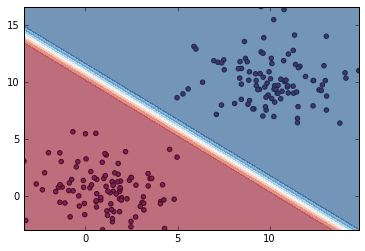

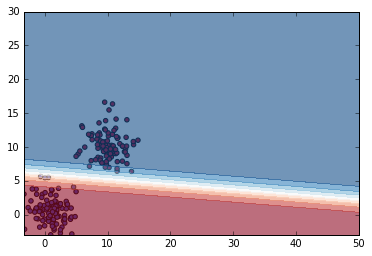

In [183]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

import numpy as np
class1_x1_mu = 1
class1_x2_mu = 1
class1_x1_sigma = 2
class1_x2_sigma = 2
x1 = np.random.normal(class1_x1_mu, class1_x2_sigma, 100)
x2 = np.random.normal(class1_x1_mu, class1_x2_sigma, 100)

class2_x1_mu = 10
class2_x2_mu = 10
class2_x1_sigma = 2
class2_x2_sigma = 2
x1 = np.concatenate((x1, np.random.normal(class2_x1_mu, class2_x2_sigma, 100)))
x2 = np.concatenate((x2, np.random.normal(class2_x1_mu, class2_x2_sigma, 100)))

color = [0 if i < 100 else 1 for i in range(200)]

X = np.array(zip(x1, x2))
y = np.array(color)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1 = LinearDiscriminantAnalysis(solver='lsqr')
fit1 = clf1.fit(X, y)

ax1.scatter(x1, x2, c=color, cmap=plt.cm.coolwarm)
ax1.hold('on')

def plot_surface(est, x_1, x_2, ax=None, threshold=0.0, contourf=False):
    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))
    # plot the hyperplane by evaluating the parameters on the grid
    X_pred = np.c_[xx1.ravel(), xx2.ravel()]  # convert 2d grid into seq of points
    if hasattr(est, 'predict_proba'):  # check if ``est`` supports probabilities
        # take probability of positive class
        pred = est.predict_proba(X_pred)[:, 1]
    else:
        pred = est.predict(X_pred)
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    if contourf:
        ax.contourf(xx1, xx2, Z, levels=np.linspace(0, 1.0, 10), cmap=plt.cm.RdBu, alpha=0.6)
        ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
        ax.set_xlim((x_1.min(), x_1.max()))
        ax.set_ylim((x_2.min(), x_2.max()))

plot_surface(clf1, X[:, 0], X[:, 1], ax=ax1, contourf=True)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

x1 = np.append(x1, -10)
x2 = np.append(x2, -10)
X = np.concatenate((X, [[50, 30]]))
y = np.append(y, 0)
color = y

clf2 = LinearDiscriminantAnalysis(solver='lsqr')
fit2 = clf2.fit(X, y)

ax2.scatter(x1, x2, c=color, cmap=plt.cm.coolwarm)
ax2.hold('on')
plot_surface(clf2, X[:, 0], X[:, 1], ax=ax2, contourf=True)

Min. Square Error Problem Illustration (Sensitivity to outliers)

<img src="files/MinSquareErrorLDA.png" style="position:relative; z-index: -5; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

<img src="files/OutlierIllustration.png" style="position:relative; z-index: -5; vertical-align='middle'; left:100;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

# Fisher's Linear Discriminant

Use $\mathbf{w}$ to project $x$ onto one dimension

If $\mathbf{w}^T \geq -w_0$ then assign $\mathbf{x}$ to class 1 else to class 0.

Select a $w$ that best "separates" the classes, i.e., 

* Maximizes class separation
* Minimizes class variance

Illustration when maximizing separation alone

<img src="files/separation_alone.png" style="position:relative; z-index: -5; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

Illustration when maximizing separation and minimizing variance

<img src="files/separation_and_variance.png" style="position:relative; z-index: -5; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

The Objective Function 

Goal 1: Maximize the "distance between classes" (in particular, the distance between the projected means)

$m_1 - m_0 \equiv \mathbf{w}^T (m_1 - m_0)$ where $\mathbf{m}_k = \frac{1}{N_k}\sum_{i : y^{(i)} = k} \mathbf{x}^(i)$ and $N_k$ is the number of inputs with class $k$.

Goal 2: Minimize the "distance within each class"

$s_1^2 + s_0^2 \equiv \sum_{i : y^{(i)} = 0} (\mathbf{w}^T\mathbf{x}^{(i)} - m_1)^2 + \sum_{i : y^{(i)} = 1} (\mathbf{w}^T\mathbf{x}^{(i)} - m_0)^2$

Objective Function: $J(\mathbf{w}) = \frac{(m_1 - m_0)^2}{s_1^2 + s_0^2}$

We can now make the dependence on $\mathbf{w}$ the objective explicit.

Let $S_\mathbf{B}$ be the between-class covariance matrix given by $S_\mathbf{B} = (\mathbf{m}_1 - \mathbf{m}_0)(\mathbf{m}_1 - \mathbf{m}_0)^T$. 

* This matrix tells us how much the means of the different independent variables (features) covary (or how they are correlated without regard for scaling). In the 2-class case, $S_\mathbf{B}$ reduces to $(\mathbf{m}_1 - \mathbf{m}_0)^2$.

Let $S_\mathbf{W}$ be the within-class covariance matrix given by $S_\mathbf{W} = \sum_{i : y^{(i)} = 0} (\mathbf{x}^{(i)} - m_1)(\mathbf{x}^{(i)} - m_1)^T + \sum_{i : y^{(i)} = 1} (\mathbf{w}^T\mathbf{x}^{(i)} - m_0)(\mathbf{w}^T\mathbf{x}^{(i)} - m_0)^T$. 

* This matrix tells us how much the means of the different independent variables (features) covary (or how they are correlated without regard for scaling). In the 2-class case, $S_\mathbf{W}$ reduces to $\sum_{i : y^{(i)} = 0} (\mathbf{x}^{(i)} - m_1)^2 + \sum_{i : y^{(i)} = 1} (\mathbf{w}^T\mathbf{x}^{(i)} - m_0)^2$

The objective function can now be expressed as $J(\mathbf{w}) = \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}}{\mathbf{w}^T\mathbf{S}_W\mathbf{w}}$

Differentaing w.r.t. $\mathbf{w}$: $\nabla_\mathbf{w} J(\mathbf{w}) = \frac{\nabla_\mathbf{w} (\mathbf{w}^T \mathbf{S}_B \mathbf{w}) (\mathbf{w}^T\mathbf{S}_W\mathbf{w}) - \nabla_\mathbf{w} (\mathbf{w}^T\mathbf{S}_W\mathbf{w}) (\mathbf{w}^T \mathbf{S}_B \mathbf{w})}{(\mathbf{w}^T\mathbf{S}_W\mathbf{w})^2}$

Now, $\nabla_\mathbf{w} (\mathbf{w}^T \mathbf{S}_B \mathbf{w}) = \mathbf{S}_B \mathbf{w}$ and $\nabla_\mathbf{w} (\mathbf{w}^T \mathbf{S}_W \mathbf{w}) = \mathbf{S}_W \mathbf{w}$

Additionally, the quadratic forms $\mathbf{w}^T \mathbf{S}_B \mathbf{w}$ and $\mathbf{w}^T \mathbf{S}_W \mathbf{w}$ are scalars. Furthermore, since $\mathbf{S}_B = (\mathbf{m}_1 - \mathbf{m}_0) (\mathbf{m}_1 - \mathbf{m}_0)^T$, we have that $\mathbf{S}_B\mathbf{w}$ is in the direction of $(\mathbf{m}_1 - \mathbf{m}_0)$.

Thus, setting the gradient to 0, we get that $\mathbf{S}_B \mathbf{w} (\mathbf{w}^T\mathbf{S}_W \mathbf{w}) - \mathbf{S}_W \mathbf{w} (\mathbf{w}^T\mathbf{S}_W \mathbf{w}) = 0$. Since we care only about the direction of $\mathbf{w}$, we can ignore the constants and hence we have $w = c \cdot \mathbf{S}_w^{-1}(\mathbf{m}_1 - \mathbf{0})$ where $c$ is some constant. 

# Perceptron

A "generalized linear function"

* $y(x) = f(\mathbf{w}^T \phi(\mathbf{x}))$

$f(a) = \begin{cases}
+1 & a \geq 0 \\
-1 & a < 0 \end{cases}$

Let $t_{i} = +1$ if $x^{(i)}$ belongs to class 1 and $t_{i} = -1$ if $x^{(i)}$ belongs to class 0.

Then, we always want $\mathbf{w}^T \phi(\mathbf{x}^{(i)}) t_i > 0$ (the classification and true class should match).

Perceptron Criterion

* Only count error from misclassified point:

$E_P(w) = - \sum \limits_{x^{(i)} \in \mathcal{M}} \mathbf{w}^T \phi(\mathbf{x}_n) t_i$ where $\mathcal{M}$ are the misclassified points.

* Stochastic Gradient Descent (SGD)

Update the weight vector according to the misclassified point (and only for the misclassified examples)

$\mathbf{w}^{(\tau + 1)} = \mathbf{w}^\tau - \eta \nabla_\mathbf{w} E_P(\mathbf{w}) = \mathbf{w}^{(\tau)} + \eta \phi(\mathbf{x}^{(i)})) t_i$.

(If $\mathbf{x^{(i)}}$ is misclassified, add $\phi(\mathbf{x^{(i)}})$ into $\mathbf{w}$.)

In [184]:
import numpy as np
import random
import os, subprocess
    
plt.ion()
    
class Perceptron:
    def __init__(self, N):
        # Random linearly separated data
        xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
        self.X = self.generate_points(N)
 
    def generate_points(self, N):
        X = []
        for i in range(N):
            x1,x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1,x1,x2])
            s = int(np.sign(self.V.T.dot(x)))
            X.append((x, s))
        return X
    
    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-1,1)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x,s in self.X:
            plt.plot(x[1], x[2], cols[s]+'o')
        if mispts:
            for x,s in mispts:
                plt.plot(x[1], x[2], cols[s]+'.')
        if vec != None:
            aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'g-', lw=2)
        if save:
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            else:
                plt.title('N = %s with %s test points' \
                          % (str(len(self.X)),str(len(mispts))))
            plt.savefig('p_N%s' % (str(len(self.X))), \
                        dpi=200, bbox_inches='tight')
 
    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
 
    def pla(self, save=False):
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s*x
            if save:
                self.plot(vec=w)
                plt.title('N = %s, Iteration %s\n' \
                          % (str(N),str(it)))
                plt.savefig('p_N%s_it%s' % (str(N),str(it)), \
                            dpi=200, bbox_inches='tight')
        self.w = w
 
    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)

<img src="files/perceptron.gif" style="position:relative; z-index: -5; vertical-align='middle'; left:0;
right:0; margin-left:auto; margin-right:auto;opacity:1; filter:alpha(opacity=100);"/>

Perceptron Convergence Theorem 

* If there exists an exact solution(i.e., the training data is linearly separable) the learning algortihm will find it in a finite number of steps.

Limitations of Perceptron Learning

* While the number of steps of the algorithm may be finite, the rate of convergence can be very slow.
* If the dataset is not linearly separable, the learning algorithm will run forever and not convergence.
* No clear generalization to more than 2 classes.